<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Data Analysis with Python</p><br>


This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. The datasets is provided regarding the performance in Mathematics (mat) and modeled under binary/five-level classification and regression tasks.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Descriptive statistics</p>
<br>
*Descriptive statistics* are brief descriptive coefficients that summarize a given data set.


In [98]:
import pandas as pd
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
df = pd.read_excel('student data-mat.xlsx', sheetname='Data') 
# creat a new DataFrame 'df', and use 'ID-code' as index 
df.head(10) # print the first 10 rows of DataFrame

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
print (df['school'].value_counts()) # count the number of student from different schools
print ('minimum value:', df['G3'].min()) # minimum value in the column “G3”
print ('maximum value:',df['G3'].max()) # maximum value in the column “G3”
print ('standard value:',df['G3'].std()) # standard value of the column “G3”
print ('mean',df['G3'].mean()) # mean of the column “G3”

GP    349
MS     46
Name: school, dtype: int64
minimum value: 0
maximum value: 20
standard value: 4.5814426109978434
mean 10.415189873417722


In [148]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [149]:
df['group'] = pd.cut(df['G3'], [-1,14,20],labels=[2,1],right=True) # create a series and replace 'Total activity' with bin label
#df['group'] = df['group'].astype(str)

In [66]:
df_gen = df.loc[:,['gender','G3']]

In [67]:
df_gen.replace(['F','M'],[0,1],inplace=True)
df_gen

,gender,G3
0,0,6
1,0,6
2,0,10
3,0,15
4,0,10
5,1,15
6,1,11
7,0,6
8,1,19
9,1,15


In [77]:
df_gen0 = df_gen[df_gen['gender']==0]['G3'].copy()
df_gen0

0       6
1       6
2      10
3      15
4      10
7       6
10      9
11     12
15     14
16     14
17     10
24      8
25      8
35      6
38     11
39     13
40     11
44      9
45      6
46     11
49      7
50     13
51     13
53     11
54     13
55     10
56     15
59     16
60     11
61     11
       ..
340    11
343     0
344    10
345    14
348    15
355     9
356    13
357    11
359    16
360    13
362    10
363    15
364    12
367     0
368    10
369    11
370     9
372    11
373     5
374    19
375    10
376    15
377    10
378    15
379    10
385    10
386     6
387     0
388     8
389     0
Name: G3, Length: 208, dtype: int64

In [79]:
df_gen1 = df_gen[df_gen['gender']==1]['G3'].copy()
df_gen1

5      15
6      11
8      19
9      15
12     14
13     11
14     16
18      5
19     10
20     15
21     15
22     16
23     12
26     11
27     15
28     11
29     11
30     12
31     17
32     16
33     12
34     15
36     18
37     15
41     12
42     18
43     11
47     20
48     14
52     10
       ..
312    11
325    11
326    16
327    10
330     8
341     0
342    15
346    16
347     9
349    13
350     8
351    13
352     8
353     8
354    11
358    10
361    12
365    10
366    13
371    12
380    14
381     7
382    10
383     0
384     5
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 187, dtype: int64

In [86]:
pd.DataFrame([stats.ttest_ind(df_gen0,df_gen1).statistic,stats.ttest_ind(df_gen1,df_gen0).pvalue], index=['statistic','pvalue'],columns=['G3']).T

,statistic,pvalue
G3,-2.061993,0.039865


In [113]:
df_chi = df.loc[:,['studytime','goout']]

In [114]:
df_chi

,studytime,goout
0,2,4
1,2,3
2,2,2
3,3,2
4,2,2
5,2,2
6,2,4
7,2,4
8,2,2
9,2,1


In [115]:
ct = pd.crosstab(df_chi['studytime'],df_chi['goout'])
ct

goout,1,2,3,4,5
studytime,,,,,
1,10,26,29,19,21
2,11,46,62,55,24
3,1,22,29,9,4
4,1,9,10,3,4


In [119]:
chi2,p,dof,ex=chi2_contingency(ct)
#pd.DataFrame(chi2_contingency(ct))#, index=['chi2','pvalue'],columns=['statistic']).T

In [125]:
pd.DataFrame([chi2,p,dof],index = ['chi2','pvalue','dof'],columns=['Chi squre result']).T

,chi2,pvalue,dof
Chi squre result,24.828734,0.015656,12.0


ValueError: Shape of passed values is (1, 4), indices imply (1, 10)

In [76]:
pd.DataFrame(stats.ttest_ind(df_sta1,df_sta2).pvalue, index=df_sta1.columns,columns=['pvalue'])

ValueError: Shape of passed values is (1, 4), indices imply (1, 10)

In [8]:
df['G3'].value_counts(sort=False) # student distribution of final grade 

0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Data Visualization</p>
<br>
*Data Visualization* plays an important role in data analysis, it provides interactive, visual representations of abstract data to amplify cognition and facilitate understanding.

In [9]:
import matplotlib.pyplot as plt # use plt.function_name to call function
import numpy as np # numpy is a fundamental package used for scientific computing

In [10]:
df1 = df[df['G3']>=15].copy() # create a new dataframe for group one students
df2 = df[df['G3']<15].copy() # create a new dataframe for group two students

In [11]:
df1['G3'].value_counts(sort=False)

15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64

In [12]:
df2['G3'].value_counts(sort=False)

0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
Name: G3, dtype: int64

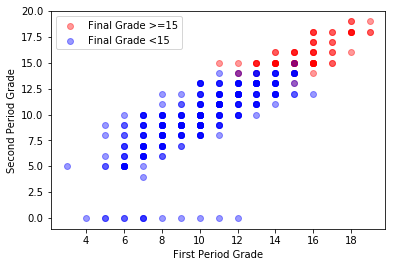

In [13]:
plt.scatter(df1['G1'],df1['G2'],c='r',alpha=0.4, label='Final Grade >=15')
plt.scatter(df2['G1'],df2['G2'],c='b',alpha=0.4, label='Final Grade <15')
plt.xlabel('First Period Grade')
plt.ylabel('Second Period Grade')
plt.legend()
plt.show()

In [14]:
df1['studytime'].value_counts(sort=False)

1    18
2    31
3    17
4     7
Name: studytime, dtype: int64

In [15]:
bin_labels = ['<2hours','2 to 5 hours','5 to 10 hours','>10 hours'] # Bins setting
data_bar1 = pd.cut(df1['studytime'], [0,1,2,3,4], labels=bin_labels).copy() # create a series and replace 'Total activity' with bin label
data_bar2 = pd.cut(df2['studytime'], [0,1,2,3,4], labels=bin_labels).copy() # same as above

In [16]:
data_bar1.value_counts(sort=False) # check the distribution of group one

<2hours          18
2 to 5 hours     31
5 to 10 hours    17
>10 hours         7
Name: studytime, dtype: int64

In [17]:
data_bar2.value_counts(sort=False) # check the distribution of group two

<2hours           87
2 to 5 hours     167
5 to 10 hours     48
>10 hours         20
Name: studytime, dtype: int64

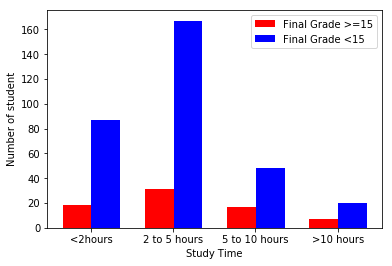

In [18]:
X=np.arange(4)+1 # 4 categories
plt.bar(X, height=data_bar1.value_counts(sort=False),width=0.35,color='r',label='Final Grade >=15')
plt.bar(X+0.35, height=data_bar2.value_counts(sort=False),width=0.35,color='b',label='Final Grade <15')
plt.xticks(X+0.17,bin_labels) # set labels of x axis
plt.xlabel('Study Time')
plt.ylabel('Number of student')
plt.legend()
plt.show()

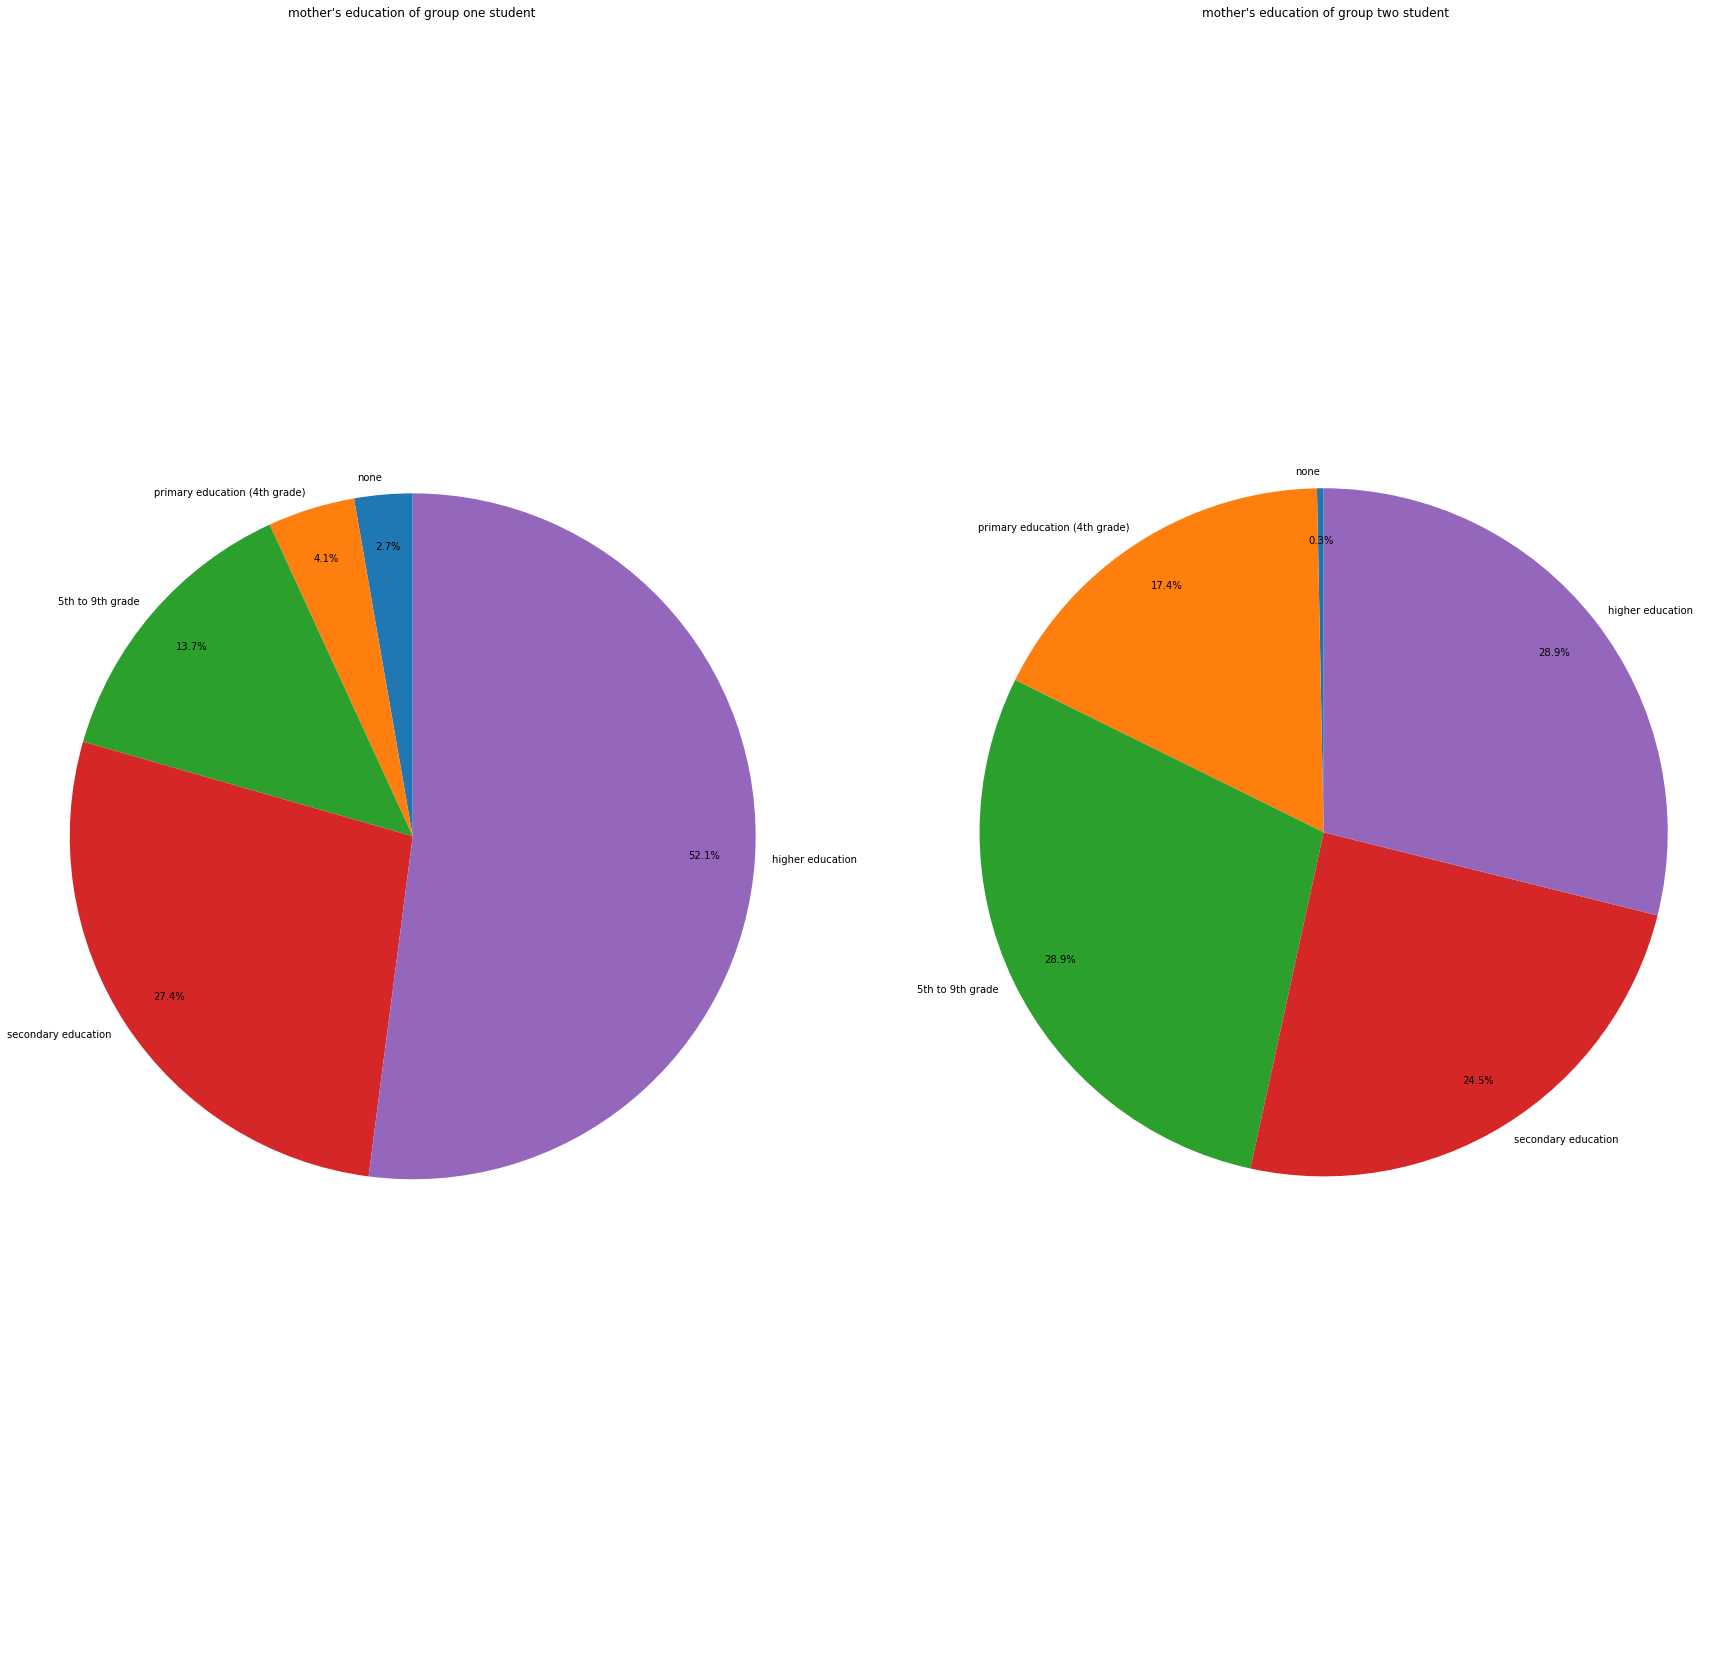

In [19]:
pie_labels = ['none','primary education (4th grade)','5th to 9th grade','secondary education', 'higher education']
fig1 = plt.figure(figsize=(30,30))
ax1_1 = fig1.add_subplot(1,2,1)
ax1_2 = fig1.add_subplot(1,2,2)
ax1_1.pie(df1['Medu'].value_counts(sort=False),labels=pie_labels,labeldistance=1.05,autopct='%1.1f%%',pctdistance=0.85,startangle=90)
ax1_1.axis('equal')
ax1_2.pie(df2['Medu'].value_counts(sort=False),labels=pie_labels,labeldistance=1.05,autopct='%1.1f%%',pctdistance=0.85,startangle=90)
ax1_2.axis('equal')

ax1_1.set_title('mother\'s education of group one student')
ax1_2.set_title('mother\'s education of group two student')
plt.rcParams['font.size']=25
plt.show()

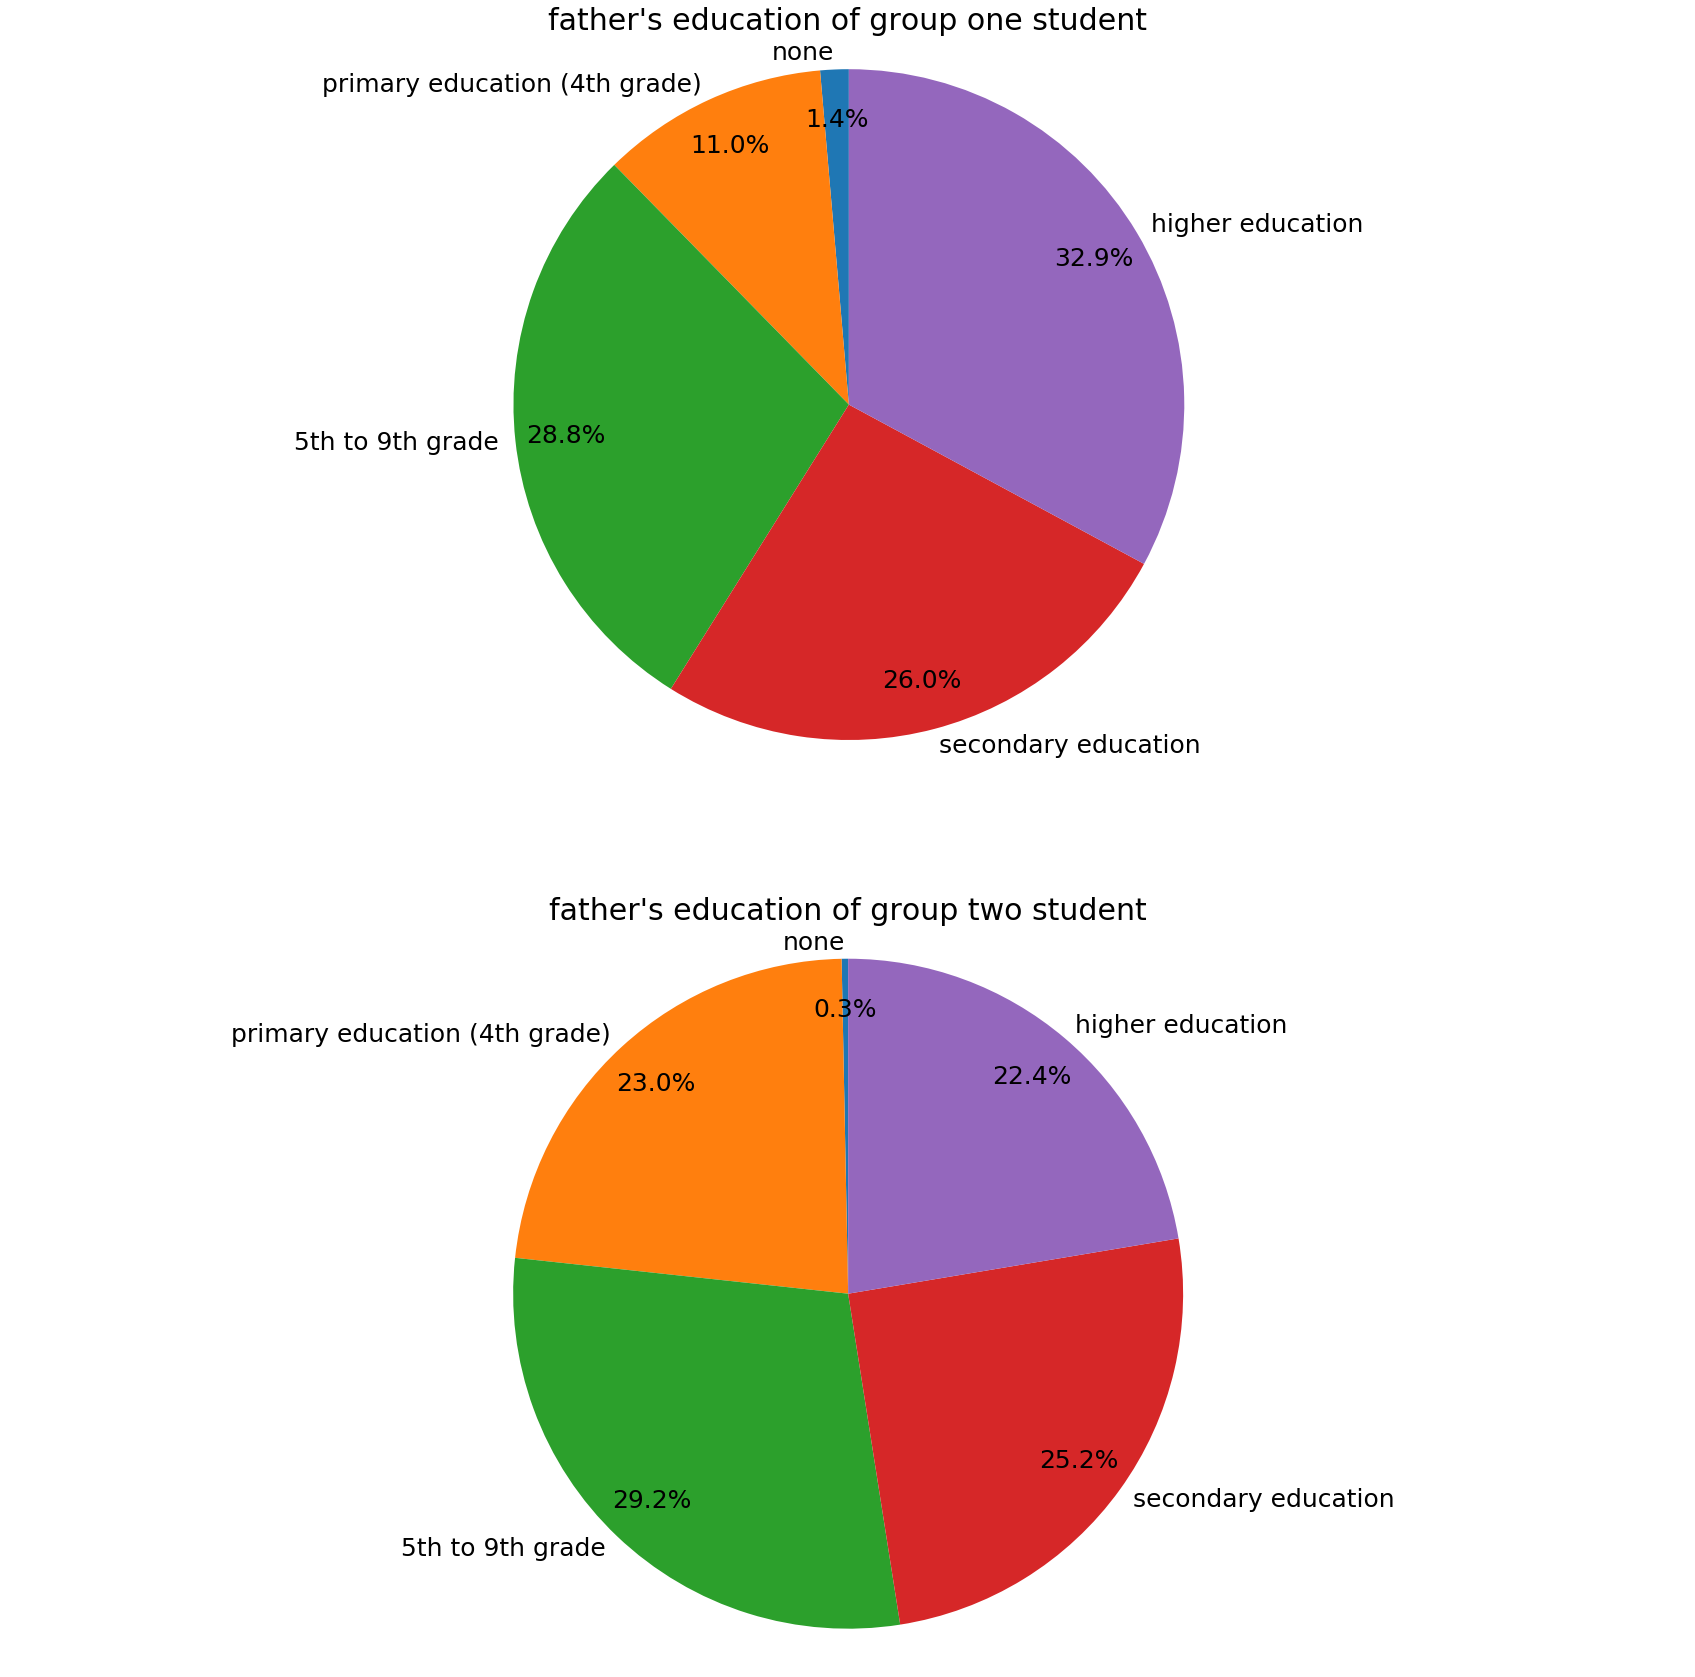

In [20]:
fig2 = plt.figure(figsize=(30,30))
ax2_1 = fig2.add_subplot(2,1,1)
ax2_2 = fig2.add_subplot(2,1,2)
ax2_1.pie(df1['Fedu'].value_counts(sort=False),labels=pie_labels,labeldistance=1.05,autopct='%1.1f%%',pctdistance=0.85,startangle=90)
ax2_1.axis('equal')
ax2_2.pie(df2['Fedu'].value_counts(sort=False),labels=pie_labels,labeldistance=1.05,autopct='%1.1f%%',pctdistance=0.85,startangle=90)
ax2_2.axis('equal')

ax2_1.set_title('father\'s education of group one student')
ax2_2.set_title('father\'s education of group two student')
plt.rcParams['font.size']=25
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Data analysis with machine learning</p>
<br>
*Machine learning* is a subfield of artificial intelligence that explores how machines can learn from data to analyze structures, help with decisions, and make predictions. In this section, we will try to predict the performance group of a student (group one or group two) with the attributes collected. 

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
# import the libraries will be used

In [22]:
df['group'] = pd.cut(df['G3'], [-1,14,20],labels=['Two','One'],right=True).copy() # create a series and replace 'Total activity' with bin label
df['group'] = df['group'].astype(str)
df.head(5)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Two
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Two
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Two
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,One
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Two


In [23]:
#features_c =['studytime','failures','schoolsup','famsup','paid','romantic','famrel','freetime','activities','goout','G1','G2']
X = df.loc[:,'school':'absences'].copy()
X.replace(['no','yes'],[0,1],inplace=True)
X.replace(['GP','MS'],[0,1],inplace=True)
X.replace(['F','M'],[0,1],inplace=True)
X.replace(['U','R'],[0,1],inplace=True)
X.replace(['LE3','GT3'],[0,1],inplace=True)
X.replace(['A','T'],[0,1],inplace=True)
X['Mjob'].replace(['other','at_home','services','health','teacher'],[1,2,3,4,5],inplace=True)
X['Fjob'].replace(['other','at_home','services','health','teacher'],[1,2,3,4,5],inplace=True)
X['reason'].replace(['home','reputation','course','other'],[1,2,3,4],inplace=True)
X['guardian'].replace(['mother','father','other'],[1,2,3],inplace=True)
#X = X.join(df.loc[:,'Medu':'Fedu'])
y = df['group'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)
y_train.value_counts()

Two    219
One     45
Name: group, dtype: int64

In [24]:
y_test.value_counts()

Two    103
One     28
Name: group, dtype: int64

In [25]:
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [26]:
predictions = clf.predict(X_test)
predictions = pd.Series(predictions, index=y_test.index)
predictions

329    One
318    One
317    Two
65     One
59     Two
287    One
212    Two
60     One
394    Two
324    Two
375    Two
74     Two
76     One
106    Two
215    Two
12     One
132    Two
264    Two
268    Two
167    One
168    Two
150    Two
90     Two
171    Two
282    Two
37     One
339    Two
113    One
135    One
102    One
      ... 
336    Two
124    Two
250    Two
89     Two
181    Two
21     One
170    Two
206    Two
173    Two
49     One
358    Two
196    One
92     Two
221    Two
218    Two
355    Two
134    Two
175    Two
22     One
241    Two
122    Two
176    One
162    Two
145    Two
299    Two
66     One
303    One
229    Two
224    One
101    One
Length: 131, dtype: object

In [27]:
predictions.value_counts()

Two    92
One    39
dtype: int64

In [28]:
accuracy_score(y_true = y_test, y_pred = predictions)# Caculate the accuracy by accuracy_score function

0.68702290076335881

In [29]:
from sklearn.feature_selection import SelectFromModel

In [30]:
coef = pd.DataFrame(clf.coef_,index=['coef'],columns=X.columns) # get weights assigned to the features of the linearSVC model
coef.T

,coef
school,-0.083108
gender,-0.031236
age,0.090252
address,0.081451
famsize,0.042362
Pstatus,0.190053
Medu,-0.131251
Fedu,0.002188
Mjob,0.009779
Fjob,-0.161680


In [31]:
abs(coef).T.mean()

coef    0.129468
dtype: float64

In [32]:
abs(coef).T.sort_values('coef',ascending=False)

,coef
higher,0.575677
schoolsup,0.521375
internet,0.469280
paid,0.227179
Pstatus,0.190053
studytime,0.187948
failures,0.167118
Fjob,0.161680
Dalc,0.148378
famsup,0.143706


In [33]:
clf_new = LinearSVC(random_state=0)
sfm = SelectFromModel(clf_new,threshold='median') # feature selector setting
sfm.fit(X_train, y_train)
X_transform = sfm.transform(X_train)

In [34]:
selected_result =pd.Series(sfm.get_support(), index=X_train.columns)

In [35]:
selected_result

school        False
gender        False
age            True
address       False
famsize       False
Pstatus        True
Medu           True
Fedu          False
Mjob          False
Fjob           True
reason        False
guardian      False
traveltime    False
studytime      True
failures       True
schoolsup      True
famsup         True
paid           True
activities    False
nursery        True
higher         True
internet       True
romantic       True
famrel        False
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
dtype: bool

In [36]:
selected_result[selected_result==True] # Keep the feature name with True value only

age          True
Pstatus      True
Medu         True
Fjob         True
studytime    True
failures     True
schoolsup    True
famsup       True
paid         True
nursery      True
higher       True
internet     True
romantic     True
freetime     True
Dalc         True
dtype: bool

In [37]:
selected_features = selected_result[selected_result==True].index
selected_features 

Index(['age', 'Pstatus', 'Medu', 'Fjob', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'nursery', 'higher', 'internet', 'romantic',
       'freetime', 'Dalc'],
      dtype='object')

In [38]:
clf_new.fit(X_transform, y_train) # train a new classifier with transformed training data set

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [39]:
predictions_new = clf_new.predict(X_test[selected_features])
predictions_new = pd.Series(predictions_new, index=y_test.index)
predictions_new

329    One
318    Two
317    Two
65     One
59     Two
287    Two
212    Two
60     One
394    Two
324    Two
375    Two
74     Two
76     One
106    Two
215    Two
12     Two
132    Two
264    Two
268    Two
167    Two
168    Two
150    Two
90     Two
171    Two
282    Two
37     One
339    Two
113    One
135    One
102    Two
      ... 
336    Two
124    Two
250    Two
89     Two
181    Two
21     One
170    Two
206    Two
173    Two
49     One
358    Two
196    One
92     Two
221    Two
218    Two
355    Two
134    Two
175    Two
22     One
241    Two
122    Two
176    Two
162    Two
145    Two
299    Two
66     One
303    One
229    Two
224    One
101    One
Length: 131, dtype: object

In [40]:
accuracy_score(y_true = y_test, y_pred = predictions_new)

0.74045801526717558

In [42]:
from sklearn.cluster import AffinityPropagation

In [43]:
features_c =['studytime','failures','schoolsup','famsup','paid','romantic','famrel','freetime','activities','goout','absences','G1','G2']
X_c = df[features_c].copy()
X_c.replace(['no','yes'],[0,1],inplace=True)

df['group'].value_counts()

Two    322
One     73
Name: group, dtype: int64

In [44]:
X_c.head()

,studytime,failures,schoolsup,famsup,paid,romantic,famrel,freetime,activities,goout,absences,G1,G2
0,2,0,1,0,0,0,4,3,0,4,6,5,6
1,2,0,0,1,0,0,5,3,0,3,4,5,5
2,2,3,1,0,1,0,4,3,0,2,10,7,8
3,3,0,0,1,1,1,3,2,1,2,2,15,14
4,2,0,0,1,1,0,4,3,0,2,4,6,10


In [45]:
af = AffinityPropagation().fit(X_c) # set the cluster machine and fit the dataset

In [46]:
df['aflabel']=af.labels_ 
df.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,group,aflabel
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,Two,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,Two,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,Two,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,One,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,Two,21


In [51]:
pd.DataFrame(af.cluster_centers_,columns=X_c.columns) # show the representatives

,studytime,failures,schoolsup,famsup,paid,romantic,famrel,freetime,activities,goout,absences,G1,G2
0,2,0,1,0,0,0,4,3,0,4,6,5,6
1,2,0,0,1,1,0,4,3,0,3,2,15,15
2,2,1,1,1,0,0,4,4,1,4,2,7,7
3,2,0,1,1,1,0,4,3,1,3,54,11,12
4,2,0,0,1,1,0,4,3,1,3,6,9,9
5,2,1,0,1,0,0,5,2,1,4,20,9,7
6,1,2,0,0,0,1,3,3,1,2,0,7,6
7,1,1,0,0,0,0,4,4,1,4,0,7,0
8,2,0,0,1,1,1,4,4,0,2,0,14,14
9,2,0,0,1,1,0,3,4,1,3,10,9,8


In [52]:
af.cluster_centers_indices_

array([  0,  48,  49,  74,  75, 118, 160, 162, 169, 180, 182, 185, 205,
       213, 245, 264, 276, 289, 304, 309, 315, 339, 356, 362], dtype=int64)

In [55]:
mean_c = df['G3'].groupby(df['aflabel']).mean()
mean_c.round(2)

aflabel
0      6.12
1     15.18
2      6.67
3      9.50
4      9.50
5      6.67
6      0.50
7      0.00
8     14.12
9      8.73
10    17.38
11    11.64
12     8.50
13     6.75
14    18.62
15     6.72
16     9.00
17    14.20
18    15.00
19    11.11
20     9.50
21    10.00
22    12.59
23    11.14
Name: G3, dtype: float64

In [56]:
df['aflabel'].value_counts(sort=False)

0      8
1     33
2     27
3      2
4     26
5      6
6     12
7     13
8     26
9     15
10    13
11    22
12     4
13    12
14     8
15    32
16     1
17    20
18     6
19     9
20     2
21    35
22    41
23    22
Name: aflabel, dtype: int64

In [250]:
df['group'].groupby(df['aflabel']).value_counts(sort=False)

aflabel  group
0        Two       8
1        One      26
         Two       7
2        Two      27
3        Two       2
4        Two      26
5        Two       6
6        Two      12
7        Two      13
8        One      12
         Two      14
9        Two      15
10       One      13
11       Two      22
12       Two       4
13       Two      12
14       One       8
15       Two      32
16       Two       1
17       One      10
         Two      10
18       One       3
         Two       3
19       Two       9
20       Two       2
21       Two      35
22       One       1
         Two      40
23       Two      22
Name: group, dtype: int64